# EDA-4. СТАТИСТИЧЕСКИЕ ТЕСТЫ (HW-03)
Используя информацию по мидиям Петербурга и Магадана, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе. 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.

- [Объедините два массива в DataFrame](#01) 
- [Обоснуйте выбор теста на корреляцию](#02) 
- [Сделайте вывод по гипотезе](#03)
- [Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя](#04)
- [Обоснуйте выбор теста](#05) 
- [Сделайте вывод по гипотезе](#06)

## Объедините два массива в DataFrame. <a id="01"></a>
Объединим массивы в единый датафрейм.    
Недостающее значение по Петербургу заполним средним значением

In [1]:
import pandas as pd
import numpy as np

petersburg =[0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan =   [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

z = pd.DataFrame([petersburg,magadan], index= ['peter','magad']).T
z.fillna(z.peter.mean(), inplace = True)
z

,peter,magad
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


## Обоснуйте выбор теста на корреляцию <a id="02"></a>
Проверим данные на нормальность, от этого зависит выбор теста <br>
Вначале посмотрим на распределение визуально

<AxesSubplot:ylabel='Density'>

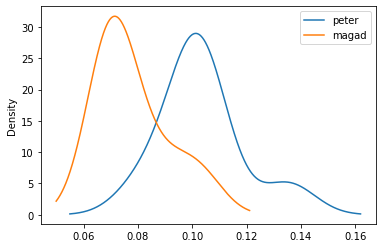

In [2]:
z.plot(kind = 'kde')

Распределение похоже на нормальное с небольшим хвостом, проведём тест.

**Тест Д’Агостино** валиден при количестве примеров более или равно 20,<br>
поэтому используем **Тест Шапиро-Уилка**
### Тест Шапиро-Уилка на нормальность

In [3]:
from scipy.stats import shapiro
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
#Установим уровень значимости
alpha = 0.05

a, p = shapiro(z)

print(a,p)
# Интерпретация 
if p > alpha: print(H0)
else: print(Ha)

0.9059994220733643 0.10032352060079575
Данные распределены нормально


Так как данные у нас **непрерывные** и распределённы **нормально**,<br> 
то можно использовать тест на **корреляцию Пирсона**.    

Вначале просто посмотрим на значение корреляции

In [4]:
z.peter.corr(z.magad)

0.24455753997284535

Видно, что корреляция слаба и дальнейших тестов проводить смысла нет,    
но, как я понял, от меня на курсе ожидают другого.<br>
Проведём тест с двумя гипотезами.<br>   
Какая гипотеза победит, зависит от установленной мною **alpha** (уровня значимости)     
Начну со стандартного значения **0.05** и в случае необходимости подкорректирую.
### тест на корреляцию Пирсона

In [5]:
from scipy.stats import pearsonr
H0 = 'сильной корреляции не обнаруженно'
Ha = 'корреляция значима'
#Установим уровень значимости
alpha = 0.05

a,p = pearsonr(z.peter,z.magad)
print('корреляция =', a)
print('Two-tailed p-value = ', p)
if p/2 > alpha: print(H0)
else: print(Ha)

корреляция = 0.24455753997284535
Two-tailed p-value =  0.5594098062056255
сильной корреляции не обнаруженно


## Сделайте вывод по гипотезе <a id="03"></a>
Сильной корреляции нет.    
Что бы сделать вывод, попробуем представить события,    
которые могли бы привести к сильной корреляции.
- Замеры производились по какому то алгоритму, например, вначале отбирались маленькие мидии, затем большие мидии
- После замеров, полученные данные были отсортированны
### Вывод
- замеряли мидии в произвольном порядке
- никто не пытался результаты отсортировать

В конце зрительно посмотрим на замеры, вдруг сможем разглядеть какие то закономерности

<AxesSubplot:>

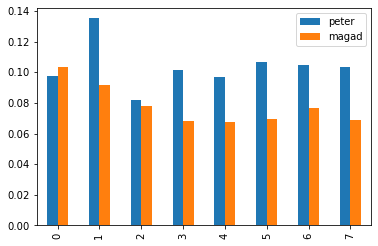

In [6]:
z.plot(kind = "bar")

----

 <a id="04"></a>
 
## Какова разница в среднем размере мидии в зависимости от города-производителя?

In [7]:
a = z.peter.mean() - z.magad.mean()
print('разница в среднем размере мидии,')
print('в зависимости от города-производителя = ',a)

разница в среднем размере мидии,
в зависимости от города-производителя =  0.025430357142857143


## Обоснуйте выбор теста <a id="05"></a>
Что бы сравнить средний размер мидий из разных городов, нужно сравнить средний размер мидий из разных городов.    

---

Но, как я понимаю, простые пути не для нас. <br>
Придётся провести тест с выдвижением гипотез, как у серьёзных ребят.

---

Зависимая переменная *(диаметр пиццы)* является **количественной**. <br>
Группы происходят из **разных совокупностей**. <br>
Следовательно, мы используем **независимый t-тест**.
## Независимый t-тест

In [8]:
from scipy.stats import ttest_ind

H0 = 'Нет значимой разницы между диаметрами мидий в разных городах.'
Ha = 'Есть значимая разница между диаметрами мидий в разных городах'
a,p = ttest_ind( petersburg, magadan, equal_var=True)

print(a,p)
if p>alpha: print(H0)
else:print(Ha) 

3.378714614917925 0.004940324868384306
Есть значимая разница между диаметрами мидий в разных городах


## Сделайте вывод по гипотезе <a id="06"></a>
Независимый t-тест показал, что средний размер мидий из разных городов разный <br>
К сожалению, тест не ответил на вопрос:<br>  
*(Какова разница в среднем размере мидии в зависимости от города-производителя)*.